# QPSK Simulation

TODO:\
1-) Make cuter figures\
2-) Add ber\
3-) Add AWGN

In [1]:
import sys
sys.path.insert(0, '../../utils')
from random_variables import *

import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
from numpy import exp as exp
from numpy import log as log
from numpy import cos as cos
from numpy import sin as sin
from numpy import sqrt as sqrt
from numpy import sign as sign
from numpy import real as real
from numpy import imag as imag

## Simulation

In [2]:
#------------------------------------------------------------------------------#
# Simulation: Calculations
#------------------------------------------------------------------------------#

# Information
sample_quantity = int(1e6)
qpsk_I = np.random.randint(2, size = sample_quantity).reshape(sample_quantity, 1)
qpsk_Q = np.random.randint(2, size = sample_quantity).reshape(sample_quantity, 1)
qpsk_symbols = (2*qpsk_I-1 + 1j* (2*qpsk_Q-1)) / sqrt(2)

# SNR range in column matrix
snr_db = np.arange(0, 32, 2)
snr_db = snr_db.reshape(snr_db.shape[0], 1)
snr_linear = 10**(snr_db/10)

# Calculating SER for all SNR values
ser = np.zeros([snr_db.shape[0], 1])
qpsk_symbols_ref = 2*qpsk_I + qpsk_Q
omega = 2
ch_coeff = rayleigh_rv(omega, sample_quantity).reshape(sample_quantity,1)
# complex_noise_normal = (gaussian_rv(0, 1, sample_quantity) + 1j*gaussian_rv(0, 1, sample_quantity))
complex_noise_normal = (np.random.normal(0, 1, sample_quantity) + 1j*np.random.normal(0, 1, sample_quantity)) 
for snr_db_i in range(snr_db.shape[0]):
    # Current SNR in linear scale
    snr_lin = snr_linear[snr_db_i]

    # Creating noise matrix for all SNR values
    complex_noise_vector =  complex_noise_normal / sqrt(snr_lin) / sqrt(2)
    complex_noise_vector = complex_noise_vector.reshape(complex_noise_vector.shape[0], 1)

    # Channel
    received_signal =  ch_coeff*qpsk_symbols + complex_noise_vector;

    # Equalizer    
    equalized_signal = received_signal / ch_coeff; 

    # Calculating SER
    demod_qpsk_I = (sign(real(received_signal))+1)/2;
    demod_qpsk_Q = (sign(imag(received_signal))+1)/2;

    qpsk_symbols_diff = 2*demod_qpsk_I + demod_qpsk_Q - qpsk_symbols_ref
    ser[snr_db_i] = sum( qpsk_symbols_diff != 0 ) / sample_quantity

## Figures

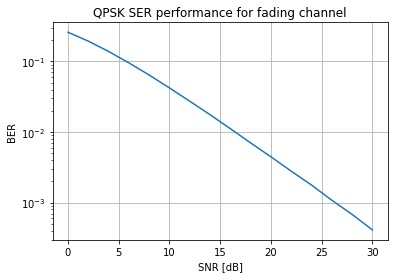

In [3]:
#------------------------------------------------------------------------------#
# Simulation: Figures
#------------------------------------------------------------------------------#
plt.figure()
plt.semilogy(snr_db, ser)
plt.grid()
plt.xlabel('SNR [dB]')
plt.ylabel('BER')
plt.title('QPSK SER performance for fading channel')
plt.show()
